<img src="https://drive.google.com/uc?export=view&id=1uDiRDsBQS2OijoIu83KvnqRfAOlToUk2" style="width: 200px;"/>

# Regression
##### Krzysztof Kuchta

Description:
- The goal of this notebook is to get familiar with regression algorithm.
- This notebook covers topics like Linear Regression, Logistic Regression and show samples for this algorithms.
- You will learn how simple it is to create simple model with the help of scikit-learn.

<a name="1.-Section-1"></a>
# 1. Linear Regression

Linear regression learns to model a dependent variable y, as a function of some independent
variables (aka "features"), xi , by finding a line (or surface) that best "fits" the data. <br>
$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon$

$y$: the dependent variable; the thing we are trying to predict. <br>
$x_i$: the independent variables: the features our model uses to model y <br> $\beta_i$: the coefficients (aka "weights") of our regression model. These are the foundations of our model. They are what our model "learns" during optimization. <br>
$\epsilon$: the irreducible error in our model. A term that collects together all the unmodeled parts of our data. data.

## 1.1 Data Initialization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('datasets/car_data.csv')

For our example we will use Vehicle dataset from kaggle. <br>
https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho <br>
It's dataset contains various information about car which can be sold. We will predict price.

In [3]:
print(dataset)

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0

You can see that our cars have many information, but for our example we don't need everything. We can decide that we'll predict Selling_Price by Year of production, Present_Price and Kms_Driven.

In [4]:
columns_to_drop = ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
dataset = dataset.drop(columns=columns_to_drop)
print(dataset)

     Year  Selling_Price  Present_Price  Kms_Driven
0    2014           3.35           5.59       27000
1    2013           4.75           9.54       43000
2    2017           7.25           9.85        6900
3    2011           2.85           4.15        5200
4    2014           4.60           6.87       42450
..    ...            ...            ...         ...
296  2016           9.50          11.60       33988
297  2015           4.00           5.90       60000
298  2009           3.35          11.00       87934
299  2017          11.50          12.50        9000
300  2016           5.30           5.90        5464

[301 rows x 4 columns]


We will split our dataset for training data and testing data. Our y will be salary and our independent variable will be experience.

In [5]:
from sklearn.model_selection import train_test_split
X_columns = ["Year", "Present_Price", "Kms_Driven"]
y_column = "Selling_Price"
X_train, X_test, y_train, y_test = train_test_split(dataset[X_columns], dataset[y_column], test_size = 0.33)

Let's show our training data.

In [6]:
print(X_train)
print(X_test)

     Year  Present_Price  Kms_Driven
275  2016          13.60       30753
204  2015           4.43       28282
261  2016           5.97        5600
164  2016           0.54       14000
184  2008           0.75       26000
..    ...            ...         ...
121  2011           1.50        6900
81   2015           7.85       40000
167  2014           0.81       42000
218  2014           9.40       45078
99   2010          20.45       50024

[201 rows x 3 columns]
     Year  Present_Price  Kms_Driven
20   2016           3.95       25000
215  2012           9.40       36100
256  2016          13.60       49562
166  2016           0.55        1000
144  2014           0.99       25000
..    ...            ...         ...
8    2016           8.89       20273
55   2009          15.04       70000
104  2017           1.47        4100
64   2017          36.23        6000
71   2011          12.48       45000

[100 rows x 3 columns]


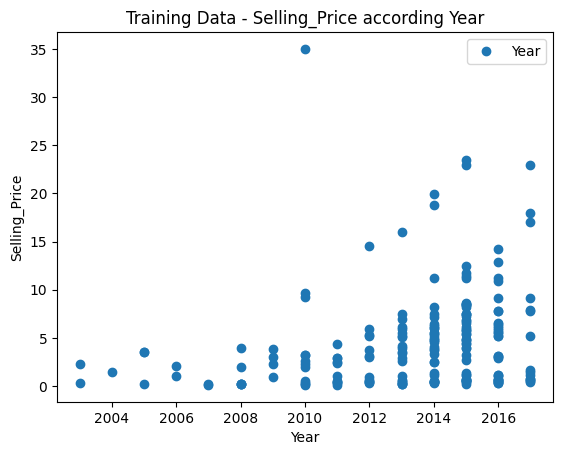

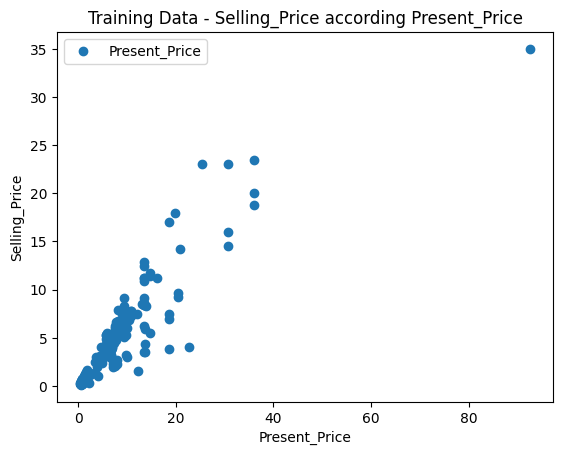

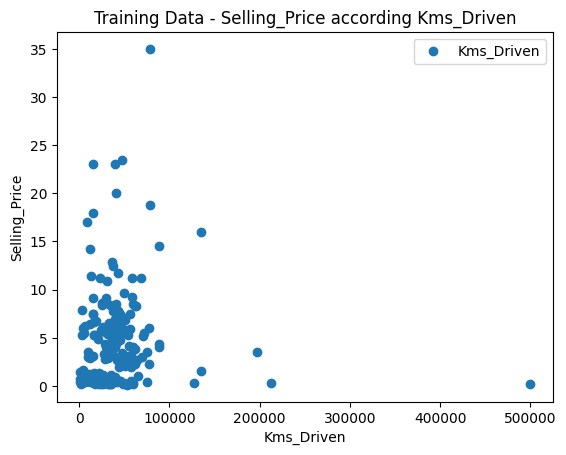

In [7]:
selected_columns = ['Year', "Present_Price", "Kms_Driven"]
for col in selected_columns:
    plt.plot(X_train[col], y_train, 'o', label=col)
    plt.xlabel(col)
    plt.ylabel('Selling_Price')
    plt.title('Training Data - Selling_Price according ' + col)
    plt.legend()
    plt.show()

## 1.2 Training model

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 1.3 Results

In [9]:
y_pred = model.predict(X_test)

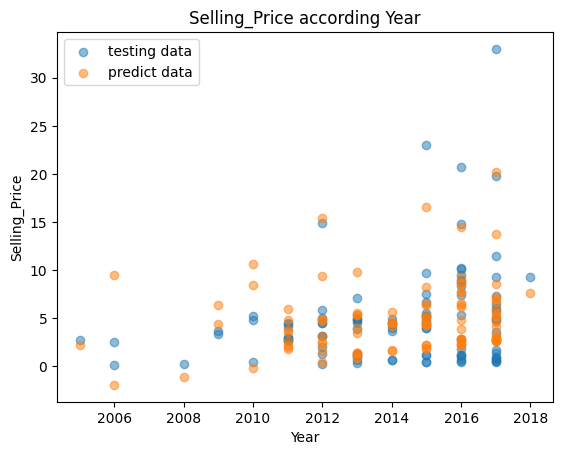

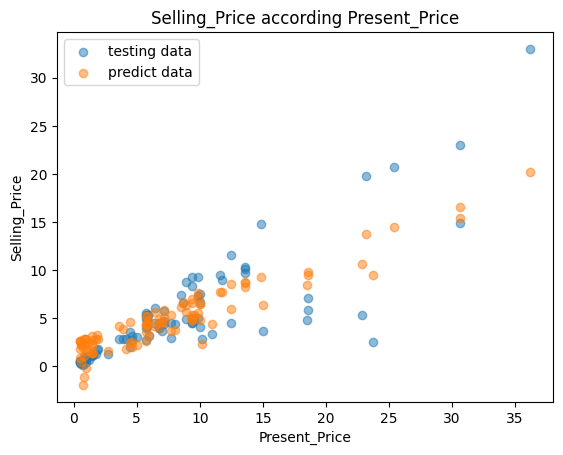

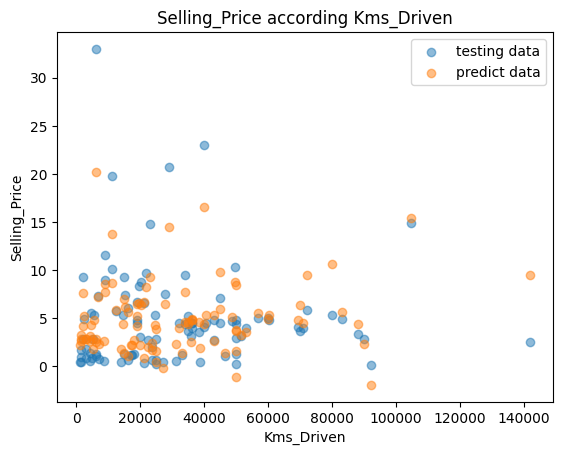

In [10]:
selected_columns = ['Year', "Present_Price", "Kms_Driven"]
for col in selected_columns:
    plt.scatter(X_test[col], y_test, label="testing data", alpha=0.5)
    plt.scatter(X_test[col], y_pred, label="predict data", alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Selling_Price')
    plt.title('Selling_Price according ' + col)
    plt.legend()
    plt.show()

In [11]:
model.score(X_test, y_test)

0.7894291310286569

# 2. Logistic Regression

Logistic regression is often used for binary classification, i.e. determining which of two groups a data point belongs to, or whether an event will occur or not. <br>
$P(y = 1|X) = sigmoid(z) = \frac{1}{1 + e^{-z}}$

$z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$

But how to make classification when we have more than two categories. We can make several models, which every will determinate if there is wanted category or others. This others categories we can treat as negative result. This strategy is called One-vs-Rest.

## 2.1 Data Initialization

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
dataset = pd.read_csv('datasets/winequality-red.csv')

We will use Wine Quality dataset from https://archive.ics.uci.edu/dataset/186/wine+quality . <br>
We want to predict quality of wine which is score between 0 and 10. So we have 11 categories. <br>

In [14]:
print(dataset)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

<Axes: >

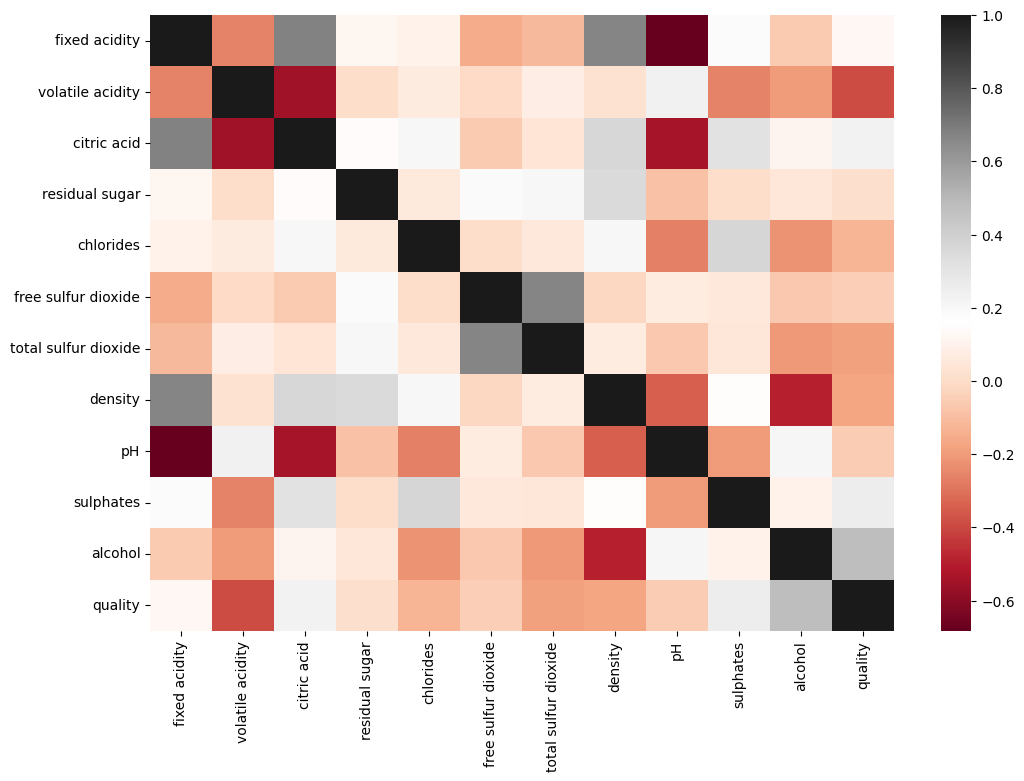

In [15]:
plt.subplots(figsize=(12,8))
sns.heatmap(dataset.corr(), cmap = 'RdGy')

By this heatmap we can see with which features quality is correlated. In this place it's your decision which features you will choose.

In [16]:
columnes = ['alcohol', 'volatile acidity', 'density', 'total sulfur dioxide', 'sulphates']

In [17]:
X = dataset[columnes]
Y = dataset['quality']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40)

## 2.2 Training model

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

## 2.3 Results

In [20]:
y_pred = model.predict(X_test)

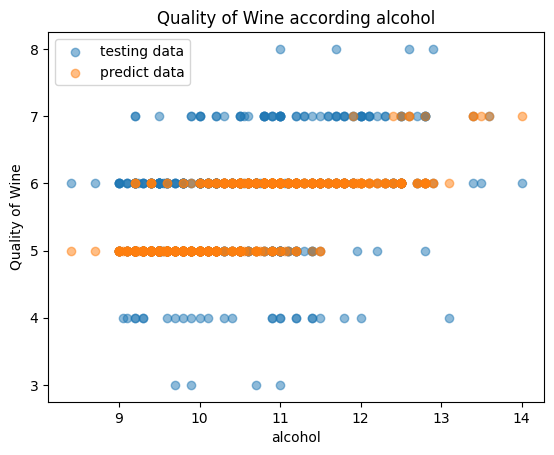

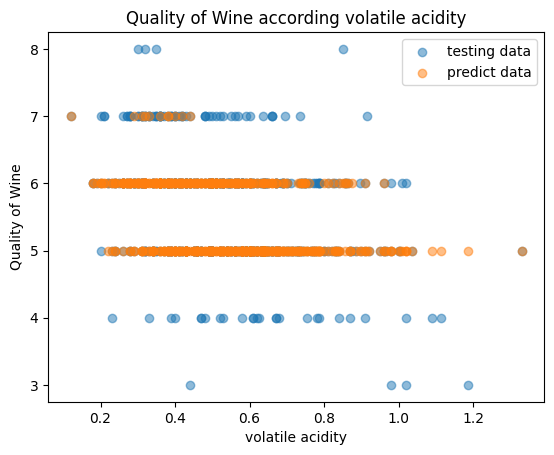

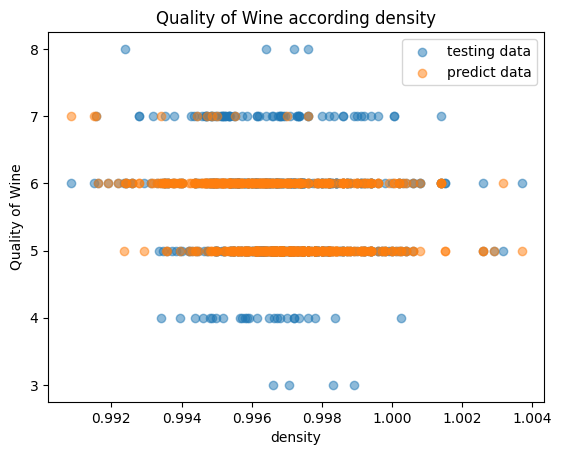

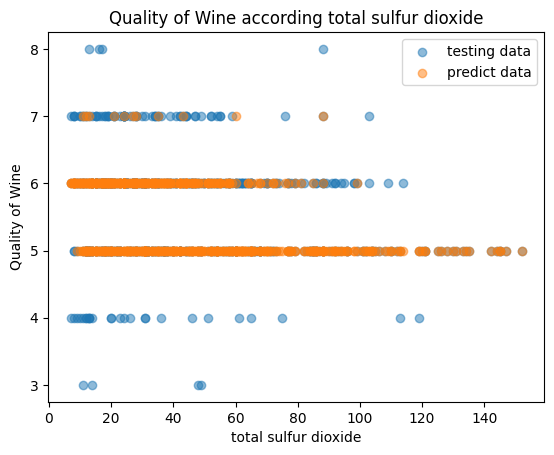

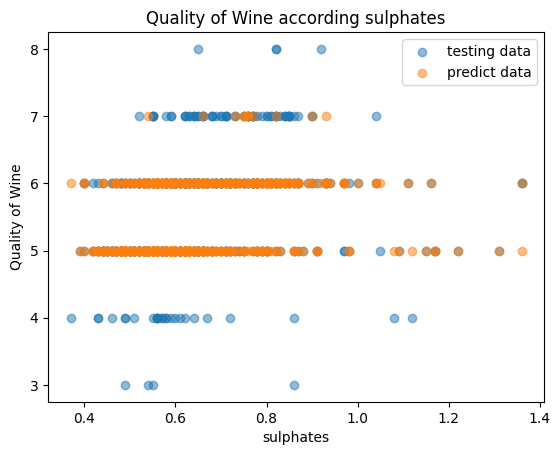

In [21]:
for col in columnes:
    plt.scatter(X_test[col], y_test, label="testing data", alpha=0.5)
    plt.scatter(X_test[col], y_pred, label="predict data", alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Quality of Wine')
    plt.title('Quality of Wine according ' + col)
    plt.legend()
    plt.show()

Model accuracy is a metric used to evaluate the performance of a classification model. It's number of correct pedictions divide bytotal number of predictions.

In [22]:
from sklearn import metrics
print("Model Accuracy :", metrics.accuracy_score(y_test, y_pred))

Model Accuracy : 0.5828125


A confusion matrix is a table that is often used to evaluate the performance of a classification model. It summarizes the predictions made by a model on a classification problem and compares them to the actual ground truth.

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,   0,   4,   0,   0,   0],
       [  0,   0,  15,  11,   0,   0],
       [  0,   0, 217,  53,   0,   0],
       [  0,   0, 114, 150,   4,   0],
       [  0,   0,   8,  54,   6,   0],
       [  0,   0,   0,   3,   1,   0]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

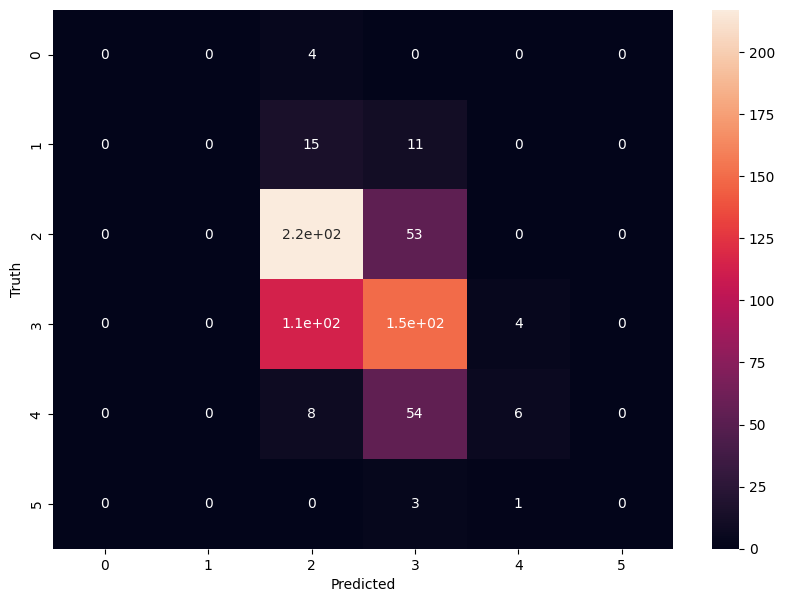

In [24]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [25]:
model.score(X_test, y_test)

0.5828125

---

This notebook is a part of introductory machine learning course, led by the [Gradient](https://gradient.eti.pg.gda.pl/) science club in the 2023/2024 school year.

<img src="https://drive.google.com/uc?export=view&id=1P7SX6J_GWlS1ENxVaZCcBO0BxHP6ULEg" width="1050"/>